## What's Feature Engeneering?

Feature engeneering is the process  of selecting, manipulating and transforming row data into features that can be used by our machime learning model. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. Feauture engeneering, in simple terms, is the act of converting row observations into desired features using statistical or machine learning approaches. The goal of Feature Engeneering is simplifying and speeding up data transformations while also enhancing model accuracy.

## List of techniques that we are going to discuss in this course are:

* Imputation : Il s’agit de remplir les valeurs manquantes dans les données. Il existe plusieurs méthodes pour cela, comme l’imputation par la moyenne, la médiane ou la mode, ou des méthodes plus complexes comme l’imputation par les k-plus proches voisins ou par régression.

* Handling Outliers : Les valeurs aberrantes sont des valeurs qui sont significativement différentes des autres. Elles peuvent être causées par des erreurs de mesure ou elles peuvent être de véritables valeurs extrêmes. Il est important de traiter ces valeurs car elles peuvent avoir un impact important sur les résultats des modèles.

* Feature Creation : C’est le processus de création de nouvelles caractéristiques à partir des données existantes. Cela peut impliquer des opérations mathématiques, la combinaison de plusieurs caractéristiques, ou la transformation de caractéristiques.

* Binning : C’est le processus de transformation de variables continues en variables catégorielles en créant des “bins” ou des intervalles.

* Variable Transformation : C’est le processus de transformation des variables pour améliorer l’interprétabilité du modèle ou sa performance. Cela peut inclure des transformations comme la normalisation, la standardisation, ou des transformations logarithmiques.

* Scaling : C’est le processus de mise à l’échelle des variables pour qu’elles aient toutes la même plage de valeurs. Cela est souvent nécessaire pour les algorithmes d’apprentissage automatique qui sont sensibles à la plage de valeurs des caractéristiques.

* One-Hot Encoding : C’est une technique utilisée pour convertir les variables catégorielles en une forme qui peut être fournie aux algorithmes d’apprentissage automatique. Chaque catégorie unique dans une variable catégorielle est transformée en une nouvelle caractéristique binaire.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd

## Import the dataset and read it

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Imputaion
Imputation : Il s’agit de remplir les valeurs manquantes dans les données. Il existe plusieurs méthodes pour cela, comme l’imputation par la moyenne, la médiane ou la mode, ou des méthodes plus complexes comme l’imputation par les k-plus proches voisins ou par régression.

### 1.1 Check the null values


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.2 Dropping rows with null values

In [4]:
# Drop missing values
df1 = df.dropna()

In [5]:
#check the null values
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
'''
Compare the lenght of dataframe before and after dropping null values
'''
len(df1), len(df)

(183, 891)

### 1.3 Drop the column
When we have a lot missing values, say more than a certain threshold, we can easily drop the column.
Let us see it in our dataset. Suppose we choose our threshold to be 0.75. That means if any column has more than 75% of missing values, we can drop it.

In [7]:
'''
 Set threshold of 0.75 and accept only those columns which have null values less than threshold
'''
threshold = 0.75
df = df[df.columns[df.isnull().mean() < threshold]]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 1.4 Numerical Impultation
Imputation is a more preferable option rather than dropping because it preserve the data size. However, there is an important selection of what you impute to missing values.
We suggest begging with considering a possible default value of missing values in the column. For example, if you have a column that only has 1 and NA,
then it is likely that NA rows correspond to 0. For another example, if you have a column that shows the "customer visit count month",
the missing values might remplaced with 0 as long you think is a sensible solution.

In another cases, the best imputationway is to use the medians of columns. As the average of the columns are sensitive to the outlier values,
while medians are more solid in this respect.

In [13]:
## Filling missing values with medians of Age column
df["Age"] = df["Age"].fillna(df["Age"].median())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
"""
    check the missing values
"""
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

## 1.5 Categorical Imputation

Remplacing the missing values with the maximum occured value in the column is a good option as well handling categorical columns.
But if you think the values in the column are distributed uniformly and there is not a dominant value, imputing a caterory like "Other"
might be more sensible, because in such a case, your imputation is likely to converge a random selection.

In [16]:
'''
    Max fill function for categorical columns
'''
df.Embarked.fillna(df.Embarked.value_counts().idxmax(),inplace=True)

In [17]:
'''
    Check the missing values
'''
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 2. Headling Outliers

Outlier Handling is a technique for removing outliers from a dataset. An outlier is a data point that point differs significaltly from other observations.


## 2.1 Standard Deviation based method to detect outliers

In the standard deviation method, we consider all the points with values more than or less than the 3(generaly) times standard deviation fron mean are considered outliers.

Dans cette méthode, on considère qu’un point est une valeur aberrante si sa valeur est supérieure ou inférieure à trois fois (généralement) l’écart type à partir de la moyenne. Cette règle est souvent appelée la “règle des trois écarts types” et est basée sur les propriétés de la distribution normale.

Voici comment cela fonctionne :

* Calculez la moyenne (µ) et l’écart type (σ) de votre jeu de données.
* Pour chaque point de données, vérifiez si la valeur de ce point est supérieure à µ + 3σ ou inférieure à µ - 3σ.
* Si c’est le cas, alors ce point est considéré comme une valeur aberrante.

In [22]:
# Check the lenght
len(df)

891

In [24]:
# Dropping the outliers rows with standard deviation, setting the limit
factor = 3
upper_limit = df['Fare'].mean() + factor*df['Fare'].std()
lower_limit = df['Fare'].mean() - factor*df['Fare'].std()


181.28449376011736

In [27]:
#Eliminate the outlier
df2 = df[(df['Fare'] < upper_limit) & (df['Fare'] > lower_limit)]

In [26]:
# Check the difference in lenght of dataset now
len(df2)

871

## 2.2 Caping the Outliers

Another option for handlinh=g outliers o=is to cap them instead of dropping. So you can keep your data size and the end of the day, it might be better for the final model performance.

In [30]:
'''
    Check the extremes i.e min and max of Fare column
'''

df['Fare'].min(), df['Fare'].max()

(0.0, 512.3292)

So in  this method, we set the values of a lower and higher percentile. A quantile is called a percentile when it is based on a 0-100 scale. The 0.95-quantile is equivalent to the 95-percentile and is such that 95% of the sample is below its value and 5% is above.
We will set upper limit of 0.95-quantile and 0.05-quantile for lower limit for outliers, meanning any sample below or above the limit is an outlier. When we encontour any outlier, we substitute its value with our upper limit if lies above upper limit and substitute its value with our lower limit if the outlier lies below lower limit.

In [31]:
# Capping the outlier rows with Percentiles
upper_lim = df['Fare'].quantile(0.95)
lower_limit = df['Fare'].quantile(0.05)
df.loc[(df['Fare'] > upper_limit), 'Fare'] = upper_limit
df.loc[(df['Fare'] < lower_limit), 'Fare'] = lower_limit

In [32]:
'''
    Check the extremes i.e min and max of Fare column
'''

df['Fare'].min(), df['Fare'].max()

(7.225, 181.28449376011736)

In [35]:
# Check the dataset lenght
len(df)

891

## 3. Feature Creation

Preprocessing is all about changing row data into something that will help you improve the performance of your model. But you must be thinking how can we create own Feature and will it help increase the performance of my model?
Creating features involves identifying the variables that will be most usuful in the predictive model. This is a subjective process that required human intervention and creativity.

Example, the dataset, if we see for a person in record, sibsp tells us about number of sibling/spouses aboard the Titanic and parch tells us about of parents/children aboard the Titanic. Perhaps people travelling alone did better? Or on the other hand perhaps if you had a family, you might have risked your life looking for them, or even giving up to them in a lifeboat.
So, feature creation is the process of construting new features from existing data to train machine learning model. Let's implement the above statement for our data.

In [37]:
# Create new family _size column
df['family_size'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


## 4. Binning

Data binning is a data-preprocessing method used to minimize the effects of small observation errors which tends to improve the model performance applying domain knowladge. Binning is done to create bins for continous numerical variables where they are converted to categorical variables.

The original data values are divided into small intervals known as bins and then they are replaced by a general value caculatated for that bin. This has a smoothing effect on the input data and may also reduce the chances of overfitting in case of small datasets. It also helps in avoiding the effects of outliers as we are grouping them into one special group.

Suppose we want to perform binning on age groups in our dataset beause more than numerical age, what kind of people(based on their age like old, children or adult) is more important for us to know in order to understand what patterns are going on to build the model. Maybe, Children and Old were given priority to sit in lifboat, so of survival are more, So let's see how we can use binning in such case.

if age < 18, then children
if age > 18 and < 50
And if age > 50 then old

 Binning : C’est le processus de transformation de variables continues en variables catégorielles en créant des “bins” ou des intervalles.

In [38]:
# perform binning for different age groups
df['Age_group'] = pd.cut(df['Age'],bins=[0,18,50,100],labels=['Children','Adult','Old'])
df['Age_group'] .value_counts()

Age_group
Adult       688
Children    139
Old          64
Name: count, dtype: int64

<Axes: xlabel='Age_group'>

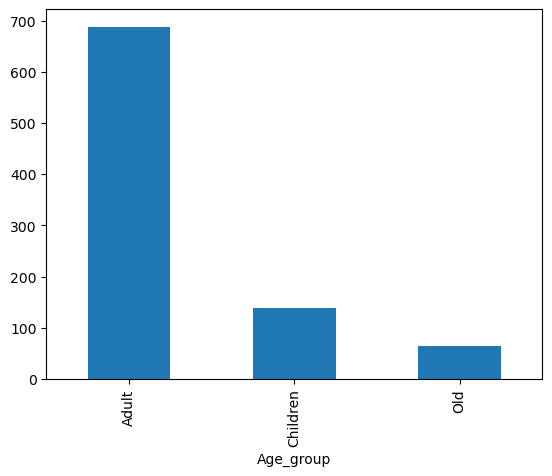

In [39]:
# Plot bar graph showing different age groups
df['Age_group'] .value_counts().plot.bar()

In [41]:
def bin_age(age):
    if age < 18:
        return 'child'
    elif age < 50:
        return 'adult'
    else:
        return 'old'

# Appliquer la fonction à la colonne d'âge
df['age_group'] = df['Age'].apply(bin_age)
df['age_group'] .value_counts()

age_group
adult    704
child    113
old       74
Name: count, dtype: int64

## 5. Variable Transformation

### What's a Nornal Distribution?

Normal distribution is widely used probability and statistical concept where mean, median, and mode of such distribution have the same value and it can be defined with jsut two parameters: mean and variance.

Some Machine Learning models, like liner and logistic regression, assume that the variables follow a normal distribution. More likely, variables in real datasets will follow more a skewed distribution.

A skewed distribution is neither symetric nor normal because the data points cluster mor toward one side of the scale than other creating a curve where there is no such mirror imaging.

If a variable is not normally distributed, sometimes it is possible to find a mathematical transformation for such skewed distributios so that the transformed variable is Normal. Normally distributes variables many times boost the machine learning algorithm performance.

The most commonly-used methods to tranforma variables are the following:
* Logorithm transformation - log(x)
* Square root transformation - sqrt(x)
* Reciprocal transformation - 1/x
* Exponential transformation - exp(x)

![](images1.jpg)


<Axes: ylabel='Frequency'>

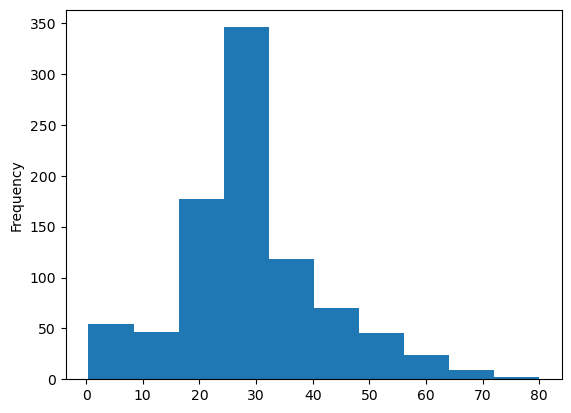

In [42]:
# Check the distribution for "Age" column using histogram
df['Age'].plot.hist()


### We can observe that this is left Skewed distribution. Let's apply the transformation techniques and compare it before and after transformation.

<Axes: ylabel='Frequency'>

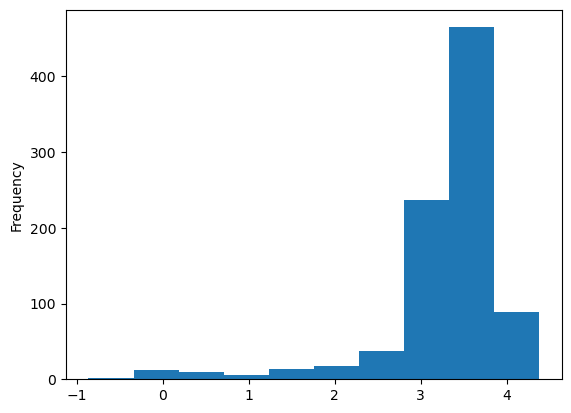

In [44]:
# Apply Logarithm transformation
df['Age_log'] = np.log(df['Age'])
df['Age_log'].plot.hist()

### We can observe here that logarithmic transformation did not produce a Normal distribution for Age column, instead a rigth Skewed distribution.

<Axes: ylabel='Frequency'>

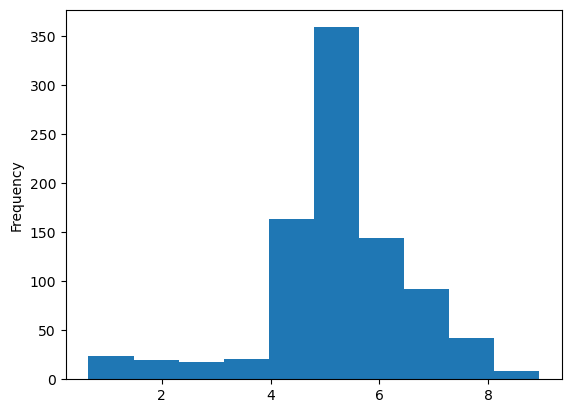

In [45]:
# Apply Square root transformation
df['Age_sqrt'] = df['Age']**(1/2)
df['Age_sqrt'].plot.hist()

### This is better but not perfect as it is still slightly right(or positively) skewed

<Axes: ylabel='Frequency'>

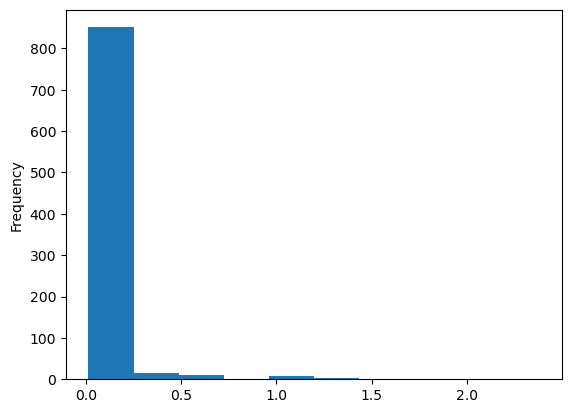

In [46]:
# Apply Reciprocal transformation
df['Age_rp'] = 1/df['Age']
df['Age_rp'].plot.hist()

### This transformation is also not useful to transform Age into a normally distributed variable

<Axes: ylabel='Frequency'>

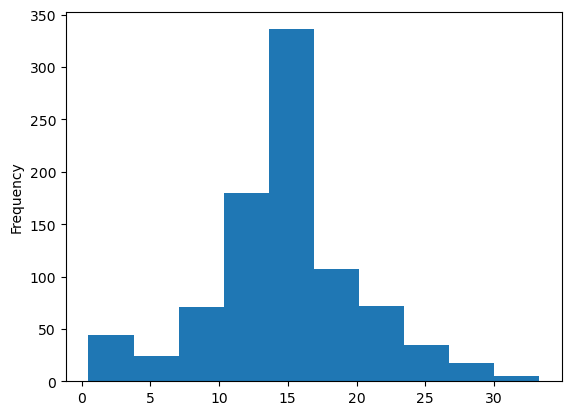

In [47]:
# Apply Exponantial transformation
df['Age_sqrt'] = df['Age']**(4/5)
df['Age_sqrt'].plot.hist()

### This one is the best of  all the tranformations above, which is also normal distribution for our variable(or column)

## 6. Scalling 

Feature scaling is on of the most unvisersal and fifficult problems in machine learning, yet it's one of the most important to get right. In most cases, the numerical feautures of the dataset do not have a certain range and they  differ from each other. In real life, we don't expect age and income columns to have the same range. But from the machine learning point of view, how these two columns can be compared?

Due to higher range, machine learning models create bias towards income column, but we wanna examine each feature equaly. If not scale, the feature with a  higher value range starts dominating when calculating distances.

After a scaling operation, the continuous features become similar in terms of range. Although this step isn't required for many algorithms, it's stil a good idea to do so.

There're two common ways for scaling:
  1. Normalization: all values are scaled in a specified range between 0 and 1 via normalization(or min-max normalization). This modification has no influence on the feature's distribution, however it does worsen the effects of outliers due to lower deviations. As a result, it is a advised that outliers be dealt with prior to normalization.
  ##### Xnorm = (X - Xmean)/(Xmax - Xmin)

In [48]:
# Normalization the Age column

df['Age'] = (df['Age'] - df['Age'].mean()) / (df['Age'].max() - df['Age'].min())
df['Age'].head()

0   -0.092505
1    0.108550
2   -0.042242
3    0.070852
4    0.070852
Name: Age, dtype: float64

2. Standartization: Standartization(also know as z-score normalisation) is the process of scaling values while accounting for stardard deviation. If the  standard deviation of features differs, the range of those features will likewise differ. The effect of outliers in the characteristics is reduced as result. To arrive at a distribution with a 0 mean and 1 variance, all the points are subtracted by their mean and the result devided by the distribution's variance.

##### Z = (X - Xmean) / sigma;
 ###### where sigma = standard deviation

In [49]:
# Standartization the Fare column

df['Fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()
df['Fare'].head()

0   -0.620478
1    1.115195
2   -0.602181
3    0.622322
4   -0.598793
Name: Fare, dtype: float64

## 7. One-Hot Encoding

Categorical data are variables that conntain label values rather than numeric  values. Examples, A "pet" variable can have values "dog" and "cat" or a "color" variable can have values "red", "green" and "yellow". Some algoritms can work with  categorical data directly but many machine larning algorithms connot operate on label data directly. They require all input and output variables to numeric. This means that categorical data must be converted to numerical form.

##### How to convert Categorical data to numerical data?

One-Hot Encoding changes your categorical data, which is challenging into understandind for algorithms, to a numerical format and enables you to group your categorical data without losing any information.

If you have N distinct values/classes in the categorical column, it is enough to map them to N-1 binary columns. So one hot encoding creates new(binary) columns. indicating the presence of each possible value from the original data. The categorical variable is removed and a new bibary variable is added for each unique caterical value.

Let's see the example of color column we used in example above, what happens when we apply one-hot encoding to this categorical column.

The values in the original data are Red, blue, and yellow. We create a separate column for each possible value, Wherever the original value was Red, we put a 1 in the Red column.

Pandas get dummies makes this every easy! Pandas get dummies(pd.get_dummies()) allows you to easily one-hot encode your categorical data.

In [54]:
# Apply One-hot Encoding on Embarked and Sex column using padans get_dummies
df = pd.get_dummies(df, columns=['Embarked','Sex'])
df.head()

KeyError: "None of [Index(['Embarked', 'Sex'], dtype='object')] are in the [columns]"

In [55]:
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)
df['Sex_female'] = df['Sex_female'].astype(int)
df['Sex_male'] = df['Sex_male'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,family_size,Age_group,age_group,Age_log,Age_sqrt,Age_rp,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",-0.092505,1,0,A/5 21171,-0.620478,1,Adult,adult,3.091042,11.855999,0.045455,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.108550,1,0,PC 17599,1.115195,1,Adult,adult,3.637586,18.358064,0.026316,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",-0.042242,0,0,STON/O2. 3101282,-0.602181,0,Adult,adult,3.258097,13.551229,0.038462,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.070852,1,0,113803,0.622322,1,Adult,adult,3.555348,17.189151,0.028571,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",0.070852,0,0,373450,-0.598793,0,Adult,adult,3.555348,17.189151,0.028571,0,0,1,0,1
